In [1]:
import numpy as np
from scipy.optimize import minimize
import scipy as sp
import matplotlib.pyplot as plt
import types
import random

In [2]:
class Remez:

    def __init__(self, f_: types.FunctionType, lb_: float, ub_: float, n_: int , MAX_ITER_: int):
        self.f = f_
        self.lb = lb_
        self.ub = ub_
        self.n = n_
        self.MAX_ITER = MAX_ITER_
        self.ys = np.zeros(n_ + 2)
        self.iterations = 0

    def Error(self, x: float, alphas: np.ndarray):
        # x is the evaluation point
        # alphas are the coefficients for the approximating polynomial
        # n is the degree of approximating polynomial

        poly = 0
        for j in range(self.n+1):
            poly += alphas[j]*(x**(float(j)))

        return self.f(x) - poly

    def find_maxs(self, alphas: np.ndarray)-> np.array:
        ep = 1e-6
        xlen = (self.ub - self.lb) * 1000
        xs = np.linspace(self.lb, self.ub, xlen)
        fxs = np.abs(self.Error(xs, alphas))
        #plt.plot(fxs)
        dfxs = np.zeros(xlen-1)

        for i in range(xlen-1):
            dfxs[i] = (fxs[i+1] - fxs[i]) / ep

        maximizers = []

        for i in range(xlen-2):
            if dfxs[i] > 0 and dfxs[i+1] < 0:
                maximizers.append((xs[i] + xs[i+1])/2.) 

        #plt.plot(dfxs)

        xstar = np.array(maximizers)
        
        return xstar

    def form_mat(self, xs: np.ndarray):
        # Forms the matrix for the Remez Algorithm
        # n is the degree of polynomial we are approximating with
        n = xs.size - 2 
        
        #A is size n+2 x n+1
        A = np.zeros((n+2, n+2))
        
        for i in range(n+2):
            for j in range(n+2):
                if j == n+1:
                    A[i, j] = (-1)**(i+1)
                else:
                    A[i][j] = xs[i]**j
        return A    

    def convergence(self, xs: np.ndarray, alphas: np.ndarray):
        eps = 1e-5

        f_maxs = self.Error(xs, alphas)
        for i in range(len(f_maxs)-1):
            if abs(abs(f_maxs[i]) - abs(f_maxs[i+1])) > eps:
                return False
            if f_maxs[i] * f_maxs[i+1] > 0:
                return False
            
        return True

    def remez(self):
        xs = np.linspace(self.lb, self.ub, self.n+2)
        
        it = 0
        while it < self.MAX_ITER:
            A = self.form_mat(xs)
            bs = self.f(xs)
            
            # LU decomp on A to improve stability 
            lu, piv = sp.linalg.lu_factor(A)
            ys = sp.linalg.lu_solve((lu, piv), bs)

            ang = self.find_maxs(ys[:-1])
            if self.convergence(ang, ys[:-1]):
                self.ys = ys
                self.iterations = it
                return
            else:
                # Replace the closest points in xs with angs
                for i in range(ang.size):
                    distx = np.zeros_like(xs)
                    for j in range(len(xs)):
                        distx[j] = abs(xs[j] - ang[i])
                    replaceIdx = np.argmin(distx)
                    xs[replaceIdx] = ang[i]
            it+=1
        self.ys = ys
        self.iterations = it
        print("Remez needs more iterations")            

In [3]:
def f(x: np.ndarray):
    return x**5

def hev(x:np.ndarray):
    fx = np.zeros_like(x)
    for i, x_i in enumerate(x):
        if (x_i <= 0):
            fx[i] = 0
        else:
            fx[i] = 1
    return fx

In [44]:
for i in range(1, 4):
    print(i)

1
2
3


In [58]:
n = 30
ub = 1
lb = -1
MAX_ITER = 1
yss = np.ndarray((10, 32))
for i in range(1, 10):
    my_remez = Remez(hev, lb, ub, n, i)
    my_remez.remez()
    yss[i-1, :] = my_remez.ys

my_remez = Remez(hev, lb, ub, n, 4000)
my_remez.remez()
yss[-1, :] = my_remez.ys


#my_remez = Remez(hev, lb, ub, n, i)
#my_remez.remez()

Remez needs more iterations
Remez needs more iterations
Remez needs more iterations
Remez needs more iterations
Remez needs more iterations
Remez needs more iterations
Remez needs more iterations
Remez needs more iterations
Remez needs more iterations
Remez needs more iterations


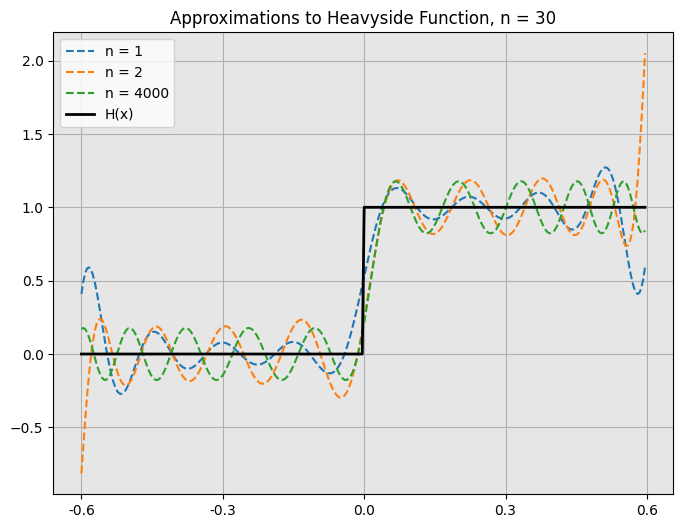

In [56]:
x_vals = np.linspace(lb, ub, 500)
x_ticks = np.round(np.linspace(lb + (ub - lb)/5, ub - (ub - lb)/5, 5), 2)
f_true = hev(x_vals)
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

for i, ys in enumerate(yss):
    #print(ys)
    poly_approx = np.polyval(ys[::-1][1:], x_vals)
    if i != 2:
        axs.plot(poly_approx[100:400], '--', label=f"n = {i+1}" , zorder = 1)  
    else:  
        axs.plot(poly_approx[100:400], '--', label=f"n = {4000}" , zorder = 1)

axs.plot(f_true[100:400], label=r"H(x)", color='k', zorder = 2, linewidth = 2)
axs.legend()
axs.grid(True)
axs.set_axisbelow(True)
plt.gca().set_facecolor((0.9, 0.9, 0.9)) 
axs.set_title(f"Approximations to Heavyside Function, n = {n}")
axs.set_xticks(np.linspace(0, 300, 5))
axs.set_xticklabels(x_ticks)
plt.show()


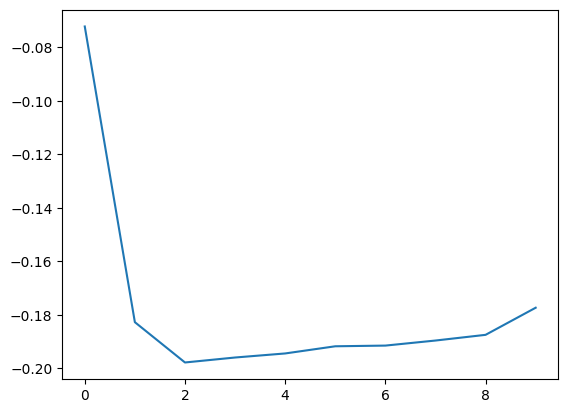

In [59]:
plt.plot(yss[:, -1])

In [638]:
x_vals[100]

-0.5991983967935872

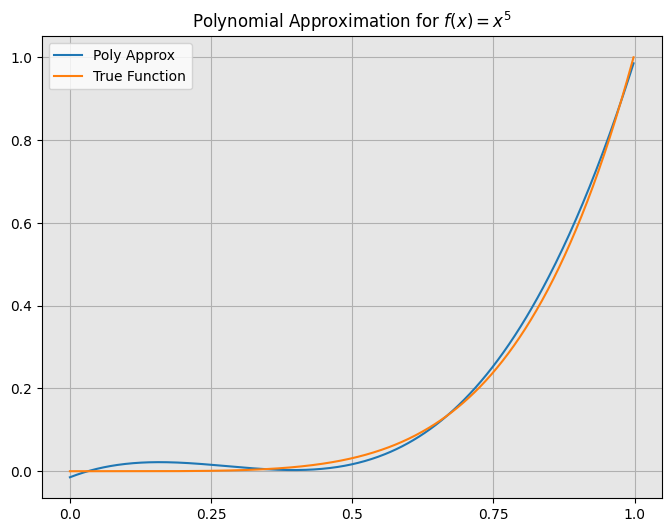

In [531]:
xspan = np.linspace(0, 1, 500)
x_ticks = np.linspace(0, 1, 5)

coefficients = np.array([-0.0146484, 0.53125, -2.34375, 2.8125, -0.0146484])
poly_x = np.polyval(coefficients[::-1][1:], xspan)

fig, axs = plt.subplots(1, 1, figsize = (8, 6))
plt.gca().set_facecolor((0.9, 0.9, 0.9)) 


axs.plot(poly_x, label = "Poly Approx")
axs.plot(f(xspan), label = "True Function")
axs.grid(True)
axs.set_title(r"Polynomial Approximation for $f(x) = x^5$" )
axs.set_xticks(np.linspace(0, 500, 5))
axs.set_xticklabels(x_ticks)
axs.legend()
plt.show()

[(0.15531062124248496, 78), (0.5120240480961924, 256), (0.8607214428857715, 430)]


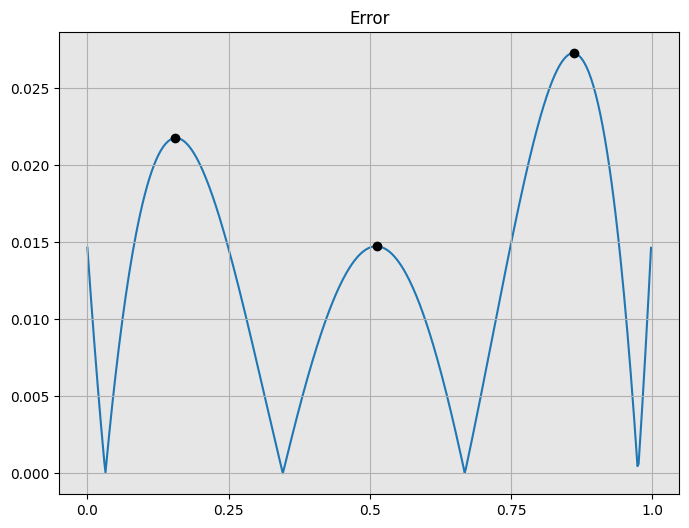

In [557]:
xspan = np.linspace(0, 1, 500)
x_ticks = np.linspace(0, 1, 5)

error = np.abs(poly_x - f(xspan))

fig, axs = plt.subplots(1, 1, figsize = (8, 6))
plt.gca().set_facecolor((0.9, 0.9, 0.9)) 

derror = np.zeros( 499)
local_maxs = []
for i in range(499):
    derror[i] = (error[i+1] - error[i]) / 1e-6 
    if i > 0:
        if derror[i-1] > 0 and derror[i] < 0:
            local_maxs.append(((xspan[i-1] + xspan[i]) / 2., i))    
axs.grid(True)
axs.set_axisbelow(True)
print(local_maxs)
axs.plot(error, zorder = 0)
axs.set_axisbelow(True)
for loc_max in local_maxs:
    plt.scatter(loc_max[0]*500, error[loc_max[1]], color = 'k', zorder =1)


axs.set_title(r"Error")
axs.set_xticks(np.linspace(0, 500, 5))
axs.set_xticklabels(x_ticks)
plt.show()